In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_path = './../../data/processed/'

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv(data_path + 'ID_Y.csv')

In [5]:
X = df.loc[df.IMPORT == 0].set_index(['ID', 'YEAR'])['VART'].unstack()
M = df.loc[df.IMPORT == 1].set_index(['ID', 'YEAR'])['VART'].unstack()

# sort by size
X = X.loc[X.sum(1).sort_values().index]
M = M.loc[M.sum(1).sort_values().index]

sizes_X = X.loc[X.sum(1).sort_values().index].sum(1)
sizes_M = M.loc[M.sum(1).sort_values().index].sum(1)

In [21]:
til_sizes_X = sizes_X/np.mean(sizes_X)
til_sizes_M = sizes_M/np.mean(sizes_M)

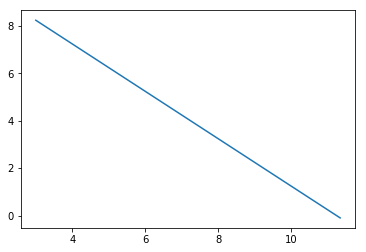

In [30]:
z = 1.17
N_factor = 1/len(M)**(1 - z)


## Should be proportional to their customer Herfindahl:
y = (N_factor/til_sizes_M)* np.mean(sizes_M**2)/np.mean(sizes_M)**2


plt.plot(np.log10(sizes_M), np.log10(y))

In [17]:
np.log(1210)

7.098375638590786

In [18]:
np.var(np.log(sizes_M))
# np.exp(np.var(np.log(sizes_M)))

9.502233019258263

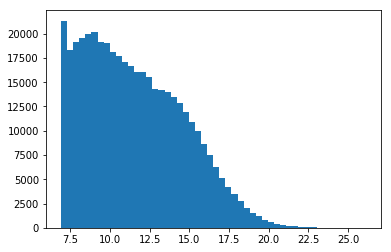

In [16]:
plt.hist(np.log(sizes_M), 50)
plt.show()

In [96]:
df2 = pd.read_csv('./../../data/processed/VAT_FY.csv')
ID_tot = df.groupby(['ID','YEAR','IMPORT'])['VART'].sum()
ID_tot = ID_tot.reset_index().rename(columns = {'VART': 'ID_tot'})
df2 = df2.merge(ID_tot)

In [97]:
df2['share2'] = (df2['VART']/df2['ID_tot'])**2

In [98]:
herfindahl = df2.groupby(['ID','YEAR','IMPORT'])['share2'].sum()
herfindahl = herfindahl.reset_index().rename(columns = {'share2': 'Herfindahl'})
herfindahl.nunique()

ID             72429
YEAR               8
IMPORT             1
Herfindahl    279142
dtype: int64

In [99]:
herf_X = herfindahl.loc[herfindahl.IMPORT == 0]
herf_M = herfindahl.loc[herfindahl.IMPORT == 1]

In [104]:
data = sizes_X.reset_index().merge(herf_X, on = 'ID').rename(columns = {0: 'size'})

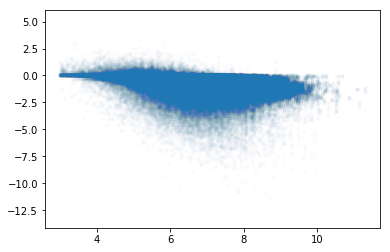

In [106]:
x = np.log10(data['size'])
y = np.log10(data.Herfindahl)
plt.plot(x, y, alpha = .01, lw = 0, marker = '.')

In [109]:
np.array([1, 3, 6])*.6

array([0.6, 1.8, 3.6])